# Unsupervised ML - Hierarchical Clustering (Univ.)
# Using sklearn normalize function

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
# import dataset
univ=pd.read_csv('Database/Universities.csv')
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
univ2=univ.iloc[:,1:]
univ2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [4]:
# Create Normalized data frame (considering only the numerical part of data)
univ2_norm=pd.DataFrame(normalize(univ2),columns=univ2.columns)
univ2_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.057602,0.003913,0.000967,0.000572,0.998323,0.004133
1,0.022252,0.001573,0.000393,0.000094,0.999750,0.001274
2,0.050283,0.002474,0.002355,0.000359,0.998725,0.002873
3,0.041538,0.002410,0.000761,0.000381,0.999130,0.002790
4,0.058443,0.003790,0.001507,0.000594,0.998274,0.004109
5,0.041628,0.002765,0.000715,0.000311,0.999125,0.002951
6,0.041597,0.002847,0.000949,0.000380,0.999125,0.003005
7,0.062235,0.003670,0.001190,0.000595,0.998043,0.004562
8,0.035398,0.002301,0.000354,0.000278,0.999368,0.002453
9,0.022230,0.001278,0.000750,0.000119,0.999751,0.001482


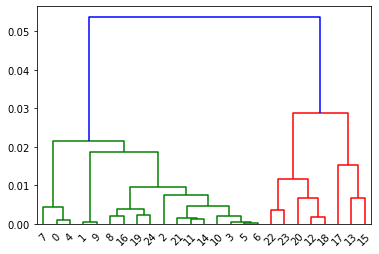

In [5]:
# Create dendrograms
dendrogram=sch.dendrogram(sch.linkage(univ2_norm,method='average'))

In [6]:
# Create Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [7]:
y=pd.DataFrame(hc.fit_predict(univ2_norm),columns=['clusters'])
y

,clusters
0,4
1,0
2,3
3,3
4,4
5,3
6,3
7,4
8,0
9,0


In [8]:
# Adding clusters to dataset
univ['clusterid']=hc.labels_
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,4
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,4
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [9]:
# Group data by Clusters (K=5)
univ.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1357.500000,87.666667,28.666667,10.000000,46689.166667,90.166667
1,1,1197.000000,71.600000,52.600000,15.000000,14187.600000,84.000000
2,2,1053.666667,38.333333,70.333333,20.666667,9318.333333,72.000000
3,3,1315.625000,83.375000,31.875000,10.375000,30122.250000,89.375000
4,4,1281.666667,82.000000,26.333333,12.666667,21564.666667,92.000000


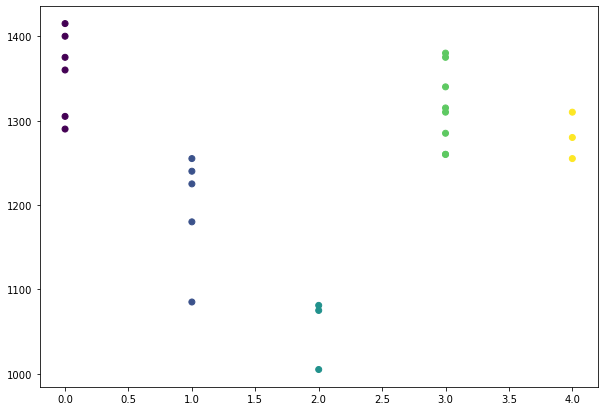

In [10]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ['clusterid'],univ['SAT'], c=hc.labels_) 